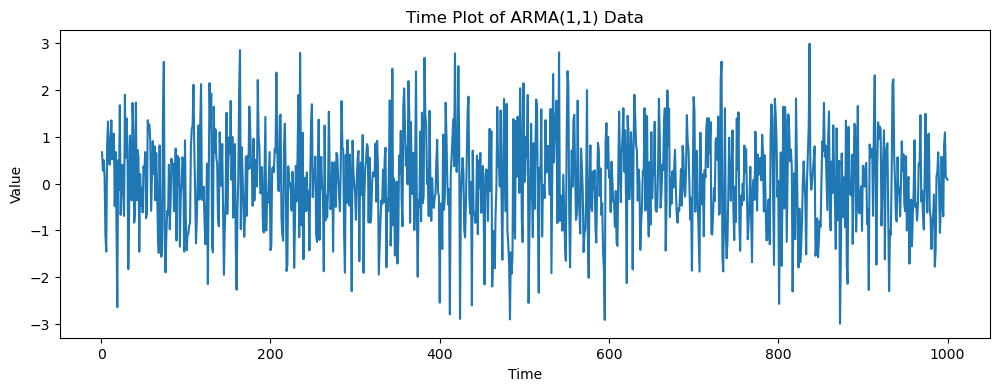

<Figure size 1200x400 with 0 Axes>

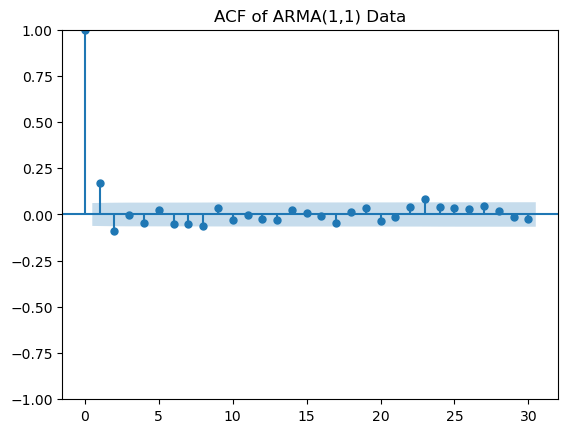

<Figure size 1200x400 with 0 Axes>

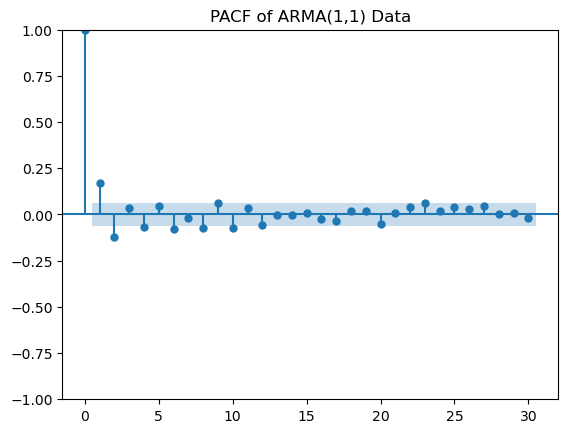

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Simulate ARMA(1,1) data
# np.random.seed(9)
np.random.seed(9)

data = sm.tsa.arma_generate_sample(ar = [1, 0.7], ma = [1, 0.9], nsample = 1000, burnin = 100, scale = 1)

# Create a Pandas Series for easier plotting
data_series = pd.Series(data, index=pd.RangeIndex(start=1, stop=len(data) + 1))

# Plot the time series
plt.figure(figsize=(12, 4))
plt.plot(data_series)
plt.title('Time Plot of ARMA(1,1) Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Plot the ACF
plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_acf(data_series)
plt.title('ACF of ARMA(1,1) Data')
plt.show()

# Plot the PACF
plt.figure(figsize=(12, 4))
sm.graphics.tsa.plot_pacf(data_series)
plt.title('PACF of ARMA(1,1) Data')
plt.show()

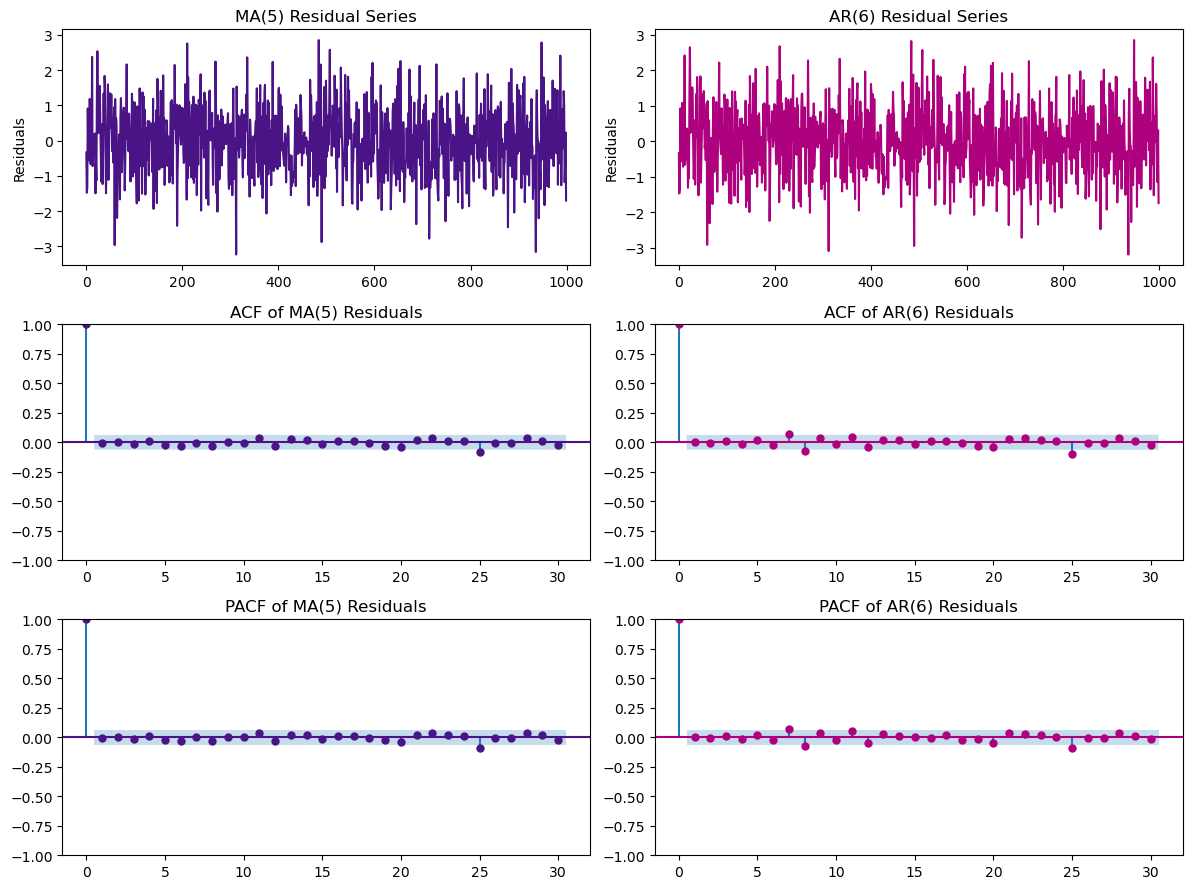

In [92]:
# Set random seed
# np.random.seed(19)

# Fit ARIMA models (AR(6) and MA(5))
model_ma = ARIMA(data, order=(0, 0, 5)).fit()
model_ar = ARIMA(data, order=(6, 0, 0)).fit()

# Plotting residuals of MA(5) model
fig, axs = plt.subplots(3, 2, figsize=(12, 9))

# Plot MA(5) residuals
axs[0, 0].plot(model_ma.resid, color="#4a1486")
axs[0, 0].set_title('MA(5) Residual Series')
axs[0, 0].set_ylabel('Residuals')

# Plot AR(6) residuals
axs[0, 1].plot(model_ar.resid, color="#ae017e")
axs[0, 1].set_title('AR(6) Residual Series')
axs[0, 1].set_ylabel('Residuals')

# Plot ACF of MA(5) residuals
plot_acf(model_ma.resid, ax=axs[1, 0], color="#4a1486")
axs[1, 0].set_title('ACF of MA(5) Residuals')

# Plot ACF of AR(6) residuals
plot_acf(model_ar.resid, ax=axs[1, 1], color="#ae017e")
axs[1, 1].set_title('ACF of AR(6) Residuals')

# Plot PACF of MA(5) residuals
plot_pacf(model_ma.resid, ax=axs[2, 0], color="#4a1486")
axs[2, 0].set_title('PACF of MA(5) Residuals')

# Plot PACF of AR(6) residuals
plot_pacf(model_ar.resid, ax=axs[2, 1], color="#ae017e")
axs[2, 1].set_title('PACF of AR(6) Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'PACF of ARIMA(1,0,1) Residuals')

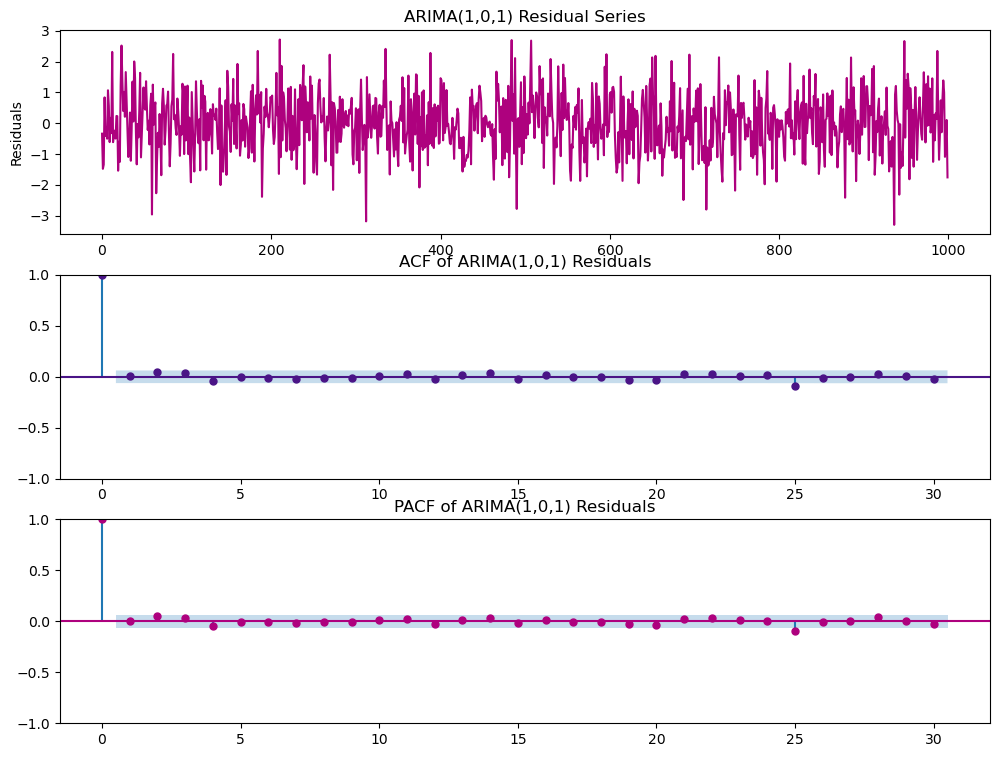

In [107]:
# set random seed
np.random.seed(9)

# fit ARIMA (1,0,1)
model_arma = ARIMA(data, order = (1,0,1)).fit()

# Residuals of the ARIMA(1,0,1) model
residuals = model_arma.resid

# Plot the the residuals series
fig, axs = plt.subplots(3, 1, figsize=(12, 9))

# Plot ARIMA(1,0,1) residuals
axs[0].plot(residuals, color="#ae017e")
axs[0].set_title('ARIMA(1,0,1) Residual Series')
axs[0].set_ylabel('Residuals')

# Plot ACF of ARIMA(1,0,1) residuals
plot_acf(residuals, ax=axs[1], color="#4a1486")
axs[1].set_title('ACF of ARIMA(1,0,1) Residuals')

# Plot PACF of ARIMA(1,0,1) residuals
plot_pacf(residuals, ax=axs[2], color="#ae017e")
axs[2].set_title('PACF of ARIMA(1,0,1) Residuals')


Text(0.5, 1.0, 'PACF of AR(1) Residuals')

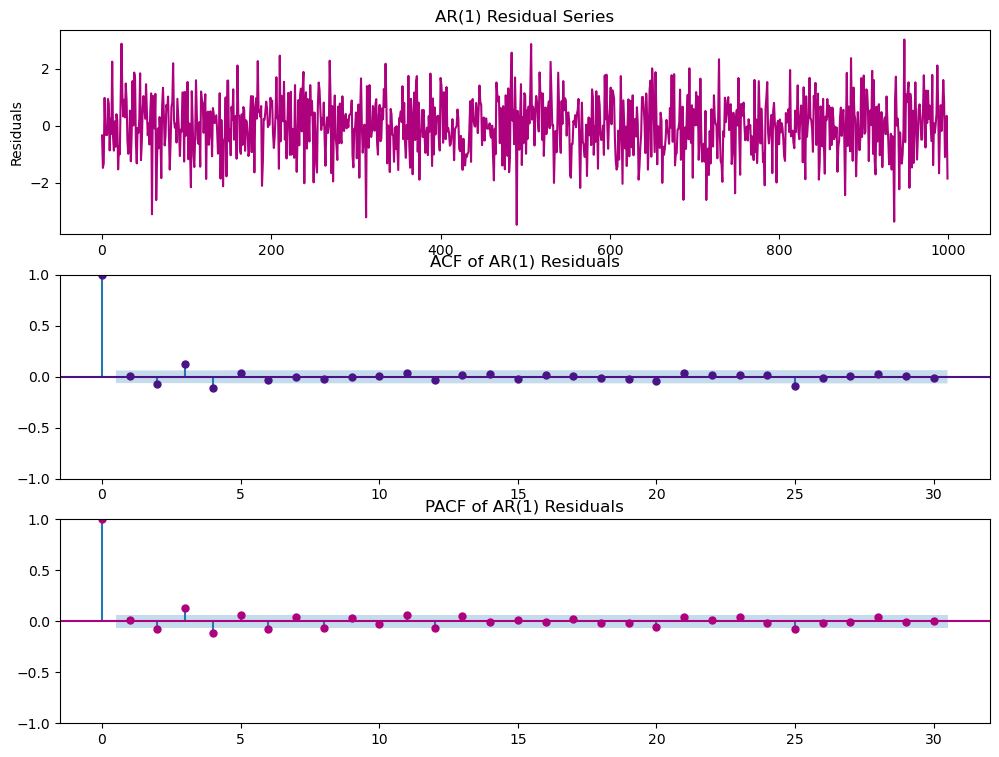

In [113]:
# set random seed
np.random.seed(9)

# fit AR (1)
model_ar1 = ARIMA(data, order = (1,0,0)).fit()

# Plotting residuals of AR(1) model
fig, axs = plt.subplots(3, 1, figsize=(12, 9))

# Plot AR(1) residuals
axs[0].plot(model_ar1.resid, color="#ae017e")
axs[0].set_title('AR(1) Residual Series')
axs[0].set_ylabel('Residuals')

# Plot ACF of AR(1) residuals
plot_acf(model_ar1.resid, ax=axs[1], color="#4a1486")
axs[1].set_title('ACF of AR(1) Residuals')

# Plot ACF of AR(1) residuals
plot_pacf(model_ar1.resid, ax=axs[2], color="#ae017e")
axs[2].set_title('PACF of AR(1) Residuals')


Text(0.5, 1.0, 'PACF of MA(1) Residuals')

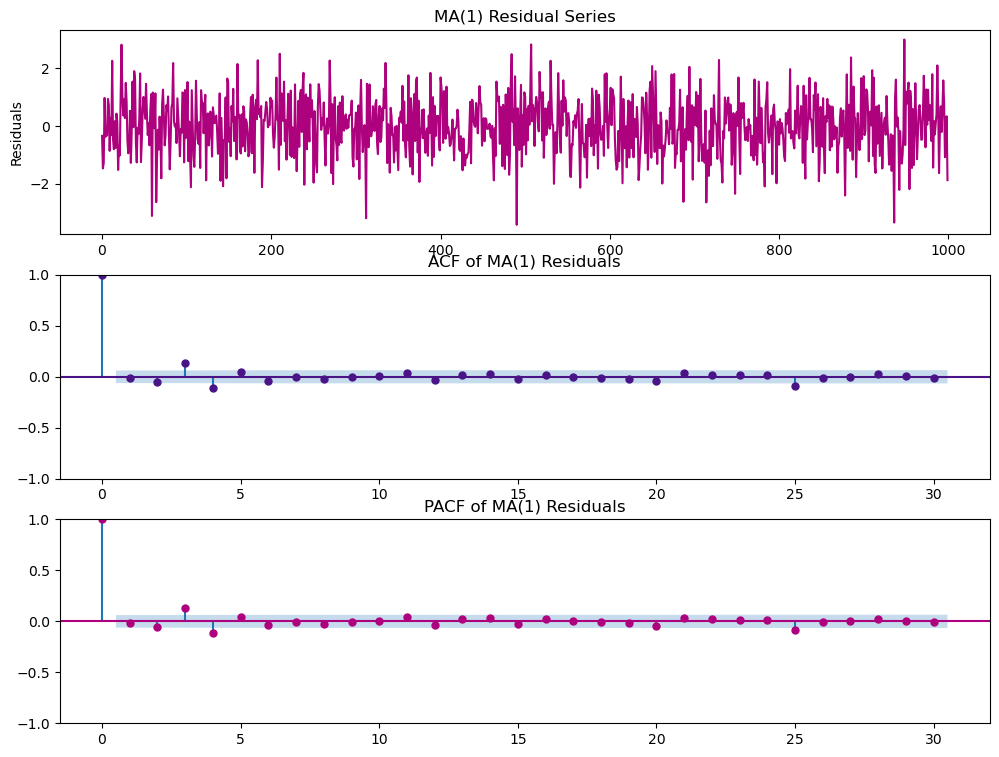

In [111]:
# set random seed
np.random.seed(9)

# fit MA (1)
model_ma1 = ARIMA(data, order = (0,0,1)).fit()

# Plotting residuals of MA(1) model
fig, axs = plt.subplots(3, 1, figsize=(12, 9))

# Plot MA(1) residuals
axs[0].plot(model_ma1.resid, color="#ae017e")
axs[0].set_title('MA(1) Residual Series')
axs[0].set_ylabel('Residuals')

# Plot ACF of MA(1) residuals
plot_acf(model_ma1.resid, ax=axs[1], color="#4a1486")
axs[1].set_title('ACF of MA(1) Residuals')

# Plot ACF of MA(1) residuals
plot_pacf(model_ma1.resid, ax=axs[2], color="#ae017e")
axs[2].set_title('PACF of MA(1) Residuals')


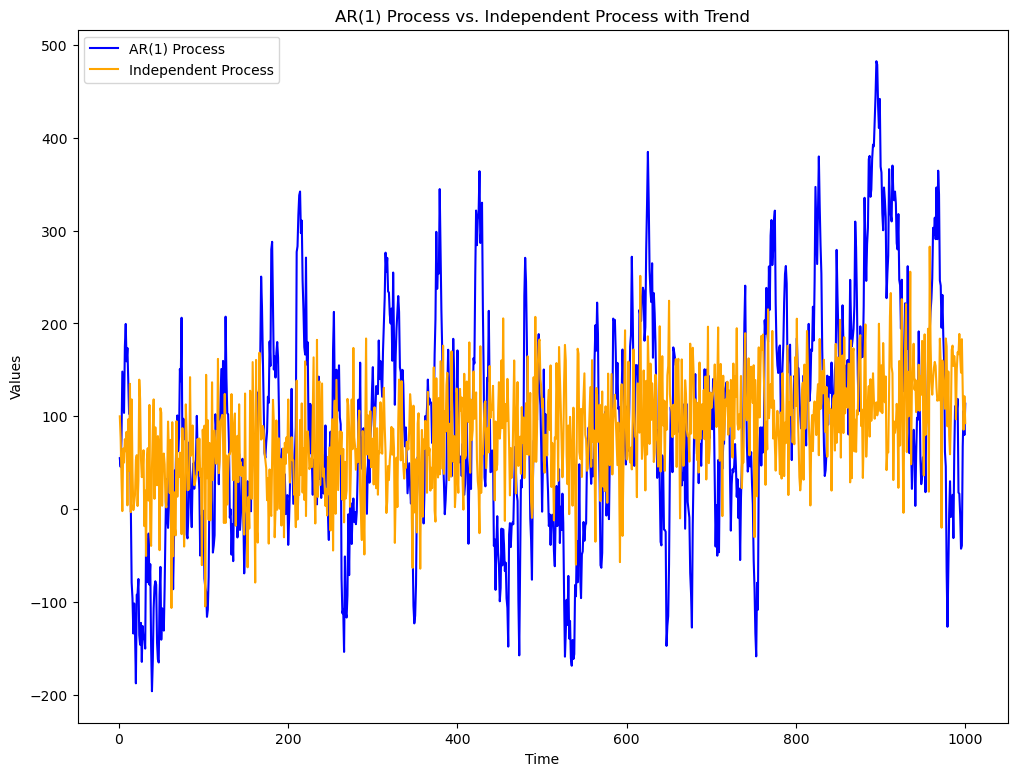

In [121]:
time = np.arange(1, 1001)
np.random.seed(42)
ar = np.array( [ 1, -0.9 ])
ma = np.array([1])

arma_process = ArmaProcess( ar, ma  )
corr_ar1 = arma_process.generate_sample(nsample = 1000, scale = 50)

corr_indep = np.random.normal(0, 50, 1000)

data_ar1 = corr_ar1 + 30 + 0.1*time 
data_indep = corr_indep + 30 + 0.1 * time

plt.figure(figsize = (12, 9 ) )
plt.plot(time, data_ar1, label = "AR(1) Process", color = "blue")
plt.plot(time, data_indep, label = "Independent Process", color = "orange")
plt.title("AR(1) Process vs. Independent Process with Trend")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()

In [191]:
# Fit a linear model to independent data

# Specify length of time series
n_simulation = 1000
time = np.arange(1,n_simulation + 1)
n = time.size

# Specify the linear trend and error variance
beta0 = 30
beta1 = 1
Z_sd = 50

# Create a matrix in which to save the estimate
# and whether or not the CI contains the true value
results = np.empty((n_simulation,2))

# Run the simulation
# set seed for reproducibility
np.random.seed(42)

for k in range(n_simulation):
    # Step 1: Generate simulated data
    X = beta0 + beta1 * time + np.random.normal(loc = 0, scale = Z_sd, size = n)
    
    # Step 2: Estimate beta1 by least square
    X_with_intercept = sm.add_constant(time)   # Add intercept (for beta0)
    model = sm.OLS(X, X_with_intercept).fit()  # Fit linear regression

    # Step 3: Save the estimate for beta1 (the slope coefficient)
    results[k,0] = model.params[1] # Beta1 estimate

    # Step 4: Compute the standard error for beta1
    SE = model.bse[1] # Standard error for beta1 (slope)

    # Step 5: Compute 95% Confidence Interval for beta1
    CI = [results[k,0] - 1.96 * SE, results[k,0] + 1.96 * SE]

    # Step 6: Check if the true beta1 is within the CI
    results[k,1] = beta1 > CI[0] and beta1 < CI[1]

In [207]:
# Calculate bias, MSE and coverage
# Bias
bias = np.mean(results[:,0])- beta1
print(f"Bias: {bias}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((results[:,0] - beta1) ** 2))
print(f"RMSE: {rmse}") 

# Coverage (percentage of times the CI contains the true beta1)
coverage = 100 * np.sum(results[:,1])/ n_simulation
print(f"Coverage: {coverage}%")

Bias: -9.717790300800555e-05
RMSE: 0.005537713669142572
Coverage: 94.6%


In [213]:
# Fit linear trend model to AR(1)
results = np.empty((n_simulation,2))

for k in range(n_simulation):
    arma_process = ArmaProcess(ar, ma)
    ar1_noise = arma_process.generate_sample(nsample = n, scale = Z_sd)
    # Generate the simulated data
    X = beta0 + beta1 * time + ar1_noise

    # Estimate beta1 by least squares
    X_with_intercept = sm.add_constant(time)
    model = sm.OLS(X, X_with_intercept).fit()

    # save the estimate and CI for beta1
    results[k, 0] = model.params[1]

    SE = model.bse[1]

    CI = [results[k, 0] - 1.96 * SE, results[k,0] + 1.96 * SE]

    results[k,1] = beta1 > CI[0] and beta1 < CI[1]

# Calculate the bias, MSE and coverage
# Bias
bias = np.mean(results[:,0])- beta1
print(f"Bias: {bias}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((results[:,0] - beta1) ** 2))
print(f"RMSE: {rmse}") 

# Coverage (percentage of times the CI contains the true beta1)
coverage = 100 * np.sum(results[:,1])/ n_simulation
print(f"Coverage: {coverage}%")

Bias: -0.001404678362243006
RMSE: 0.05392163309256206
Coverage: 34.6%


In [183]:
X_with_intercept = sm.add_constant(time)
model_linear = sm.OLS(data_ar1, X_with_intercept).fit()
model_ar1 = ARIMA(data_ar1, order = (1, 0, 0), exog = time).fit()

In [244]:
# Fit a ;inear trend model to AR(1) data and allow for AR(1) correlation

results = np.empty((n_simulation,2))

# Run the simulation
for k in range(n_simulation):
    # Generate the simulated data
    arma_process = ArmaProcess(ar,ma)
    ar1_noise = arma_process.generate_sample(nsample = n, scale = Z_sd)
    X = beta0 + beta1 * time + ar1_noise

    # Estimate beta1 by least squares
    X_with_intercept = sm.add_constant(time)
    arima_model = ARIMA(X, order = (1, 0 ,0), exog= time).fit()

    # Save the estimate and CI for beta1
    results[k, 0] = arima_model.params[2]

    SE = np.sqrt(arima_model.cov_params()[2,2]) # standard error for beta1
    CE = [results[k, 0] - 1.96 * SE, results[k, 0] + 1.96 * SE]
    results[k, 1] = beta1 > CI[0] and beta1 < CI[1]
    
# Calculate the bias, MSE and coverage
# Bias
bias = np.mean(results[:,0])- beta1
print(f"Bias: {bias}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((results[:,0] - beta1) ** 2))
print(f"RMSE: {rmse}") 

# Coverage (percentage of times the CI contains the true beta1)
coverage = 100 * np.sum(results[:,1])/ n_simulation
print(f"Coverage: {coverage}%")

Bias: -0.10741294593300588
RMSE: 0.1084061171603418
Coverage: 0.0%


In [245]:
# Bias
bias = np.mean(results[:,0])- beta1
print(f"Bias: {bias}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((results[:,0] - beta1) ** 2))
print(f"RMSE: {rmse}") 

# Coverage (percentage of times the CI contains the true beta1)
coverage = 100 * np.sum(results[:,1])/ n_simulation
print(f"Coverage: {coverage}%")

Bias: -0.10741294593300588
RMSE: 0.1084061171603418
Coverage: 0.0%


In [238]:
arima_model.cov_params()[2,2]

0.00024218833819093877